# Final document with all the plots

In [1]:
import dt 
#import cnn 
import nn 
from load_data import load_data
import os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris


In [2]:
X_train, y_train, X_test, y_test = load_data()

# Exploratory data analysis

In [3]:
savefigs = True
if savefigs:
    if not os.path.isdir('figs'):
        os.makedirs('figs')


#if savefigs: plt.savefig('../figs/DegreeDistribution.png', bbox_inches = 'tight')

In [4]:
sns.set_theme(style='whitegrid', palette="flare")
NAMES = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Shirt']

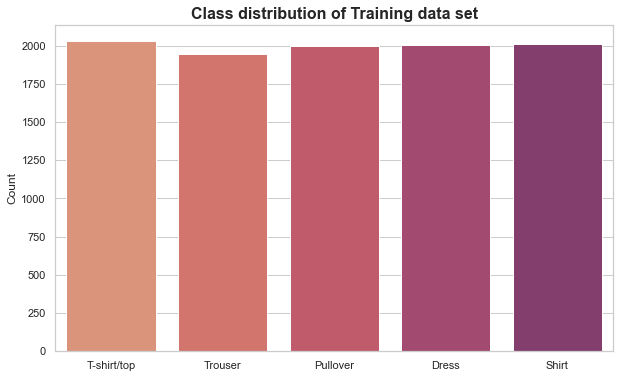

In [5]:

def plot_y_distribution(y, t):
    ''' Plot the distribution of the labels '''
    classes, classes_counts = np.unique(y, return_counts=True)

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=classes, y=classes_counts, ax=ax);
    ax.set_title(f'Class distribution of {t}', fontsize=16, fontweight='bold');
    ax.set_ylabel('Count');
    ax.set_xticklabels(NAMES);



plot_y_distribution(y_train, "Training data set")
#if savefigs: plt.savefig('figs/distributiontrainingdataset.png', bbox_inches = 'tight')

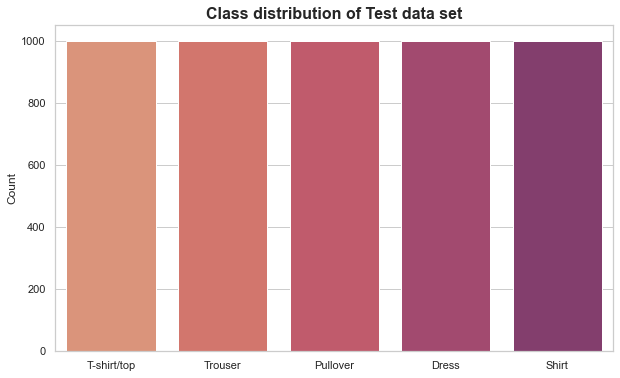

In [6]:
plot_y_distribution(y_test, "Test data set")
#if savefigs: plt.savefig('figs/distributiontestdataset.png', bbox_inches = 'tight')

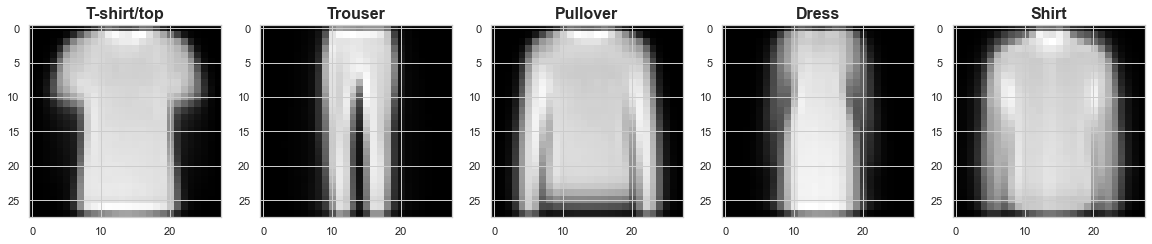

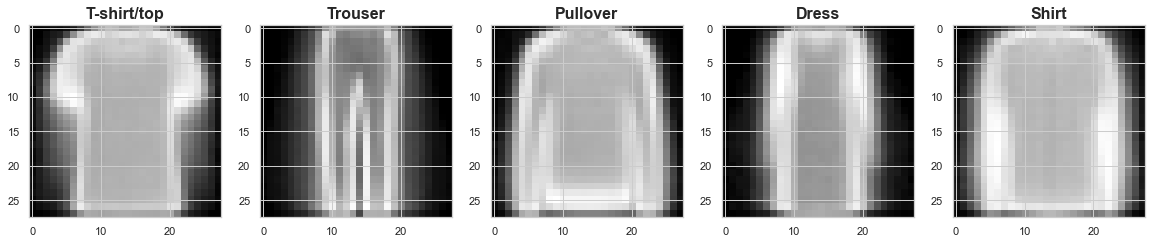

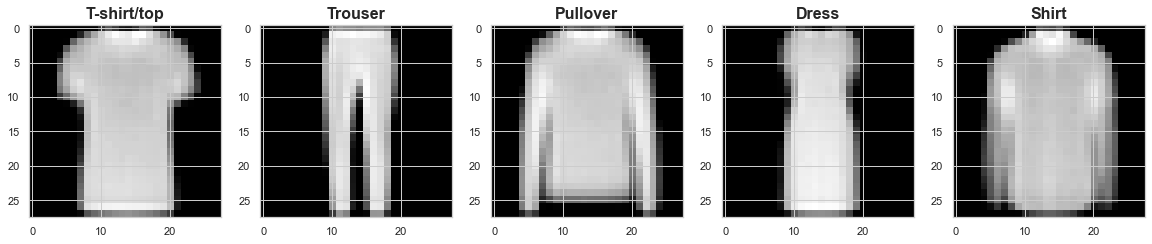

In [7]:
def plot_images(X, y, measure='mean'):
    ''' Plot the mean, median, or std of the images'''
    classes = np.unique(y)
    fig, ax = plt.subplots(1, len(classes), figsize=(20, 8))
    for c in classes:
        imgs = X[y == c]

        if measure == 'mean': av_img = np.mean(imgs, axis=0).reshape(28, 28)
        elif measure == 'median': av_img = np.median(imgs, axis=0).reshape(28, 28)
        elif measure == 'std': av_img = np.std(imgs, axis=0).reshape(28, 28)

        ax[c].imshow(av_img, cmap='gray')
        ax[c].set_title(NAMES[c], fontsize=16, fontweight='bold')


plot_images(X_train, y_train)
#if savefigs: plt.savefig('figs/mean.png', bbox_inches = 'tight')
plot_images(X_train, y_train, measure='std')
#if savefigs: plt.savefig('figs/std.png', bbox_inches = 'tight')
plot_images(X_train, y_train, measure='median')
#if savefigs: plt.savefig('figs/median.png', bbox_inches = 'tight')

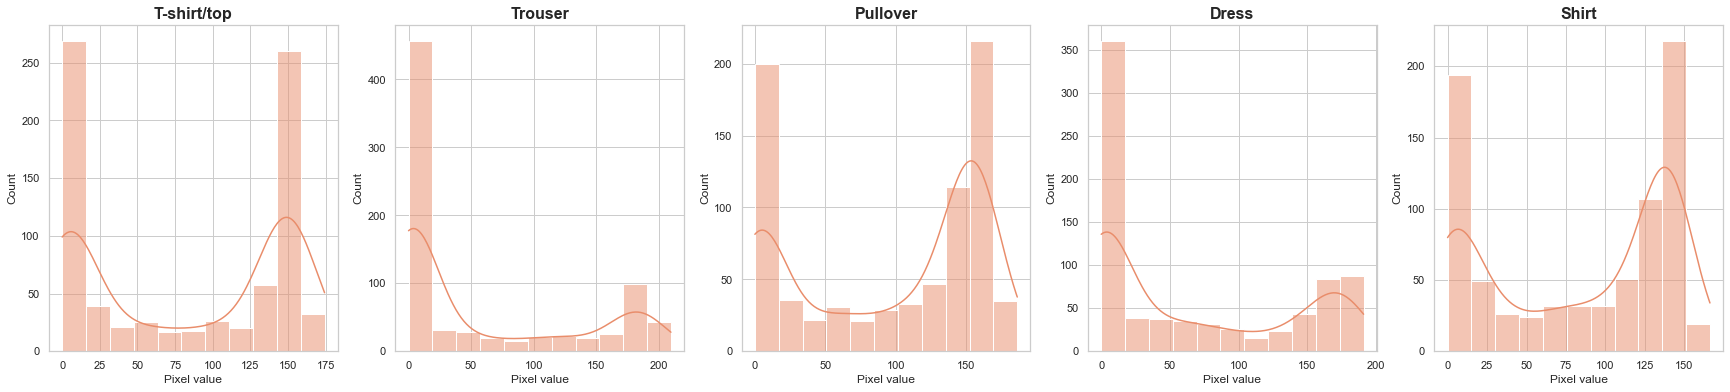

In [8]:
def plot_color_distribution(X, y):
    ''' Plot the distribution of the colors '''
    classes = np.unique(y)
    av_imgs = np.zeros((len(classes), 28, 28))
    for c in classes:
        imgs = X[y == c]
        av_imgs[c] = np.mean(imgs, axis=0).reshape(28, 28)

    #plot the distribution of the average image
    fig, ax = plt.subplots(1, len(classes), figsize=(30, 6))
    for c in classes:
        sns.histplot(av_imgs[c].flatten(), ax=ax[c], kde=True)
        ax[c].set_title(NAMES[c], fontsize=16, fontweight='bold')
        ax[c].set_xlabel('Pixel value')
        ax[c].set_ylabel('Count')

plot_color_distribution(X_train, y_train)
#if savefigs: plt.savefig('figs/colordistribution.png', bbox_inches = 'tight')

# Neural Network

In [9]:
def make_plots(data, labels, activationfunction):
    fig, axes = plt.subplots(1,2, figsize = (20, 5))
    for i, label in enumerate(labels):
        colors_taratt = ['#761878', '#826fc9', '#b1c2f0' ]
        sns.lineplot(x = 'epoch', y = label, palette = colors_taratt, data = data, ax = axes.flat[i]);
        axes.flat[i].set_title(f' History of {label} with {activationfunction}', size = 13)
        axes.flat[i].set(ylabel= f'{label}', xlabel = 'Number of epochs');

Epoch 0, loss: 0.1625, accuracy: 0.1875
Epoch 1, loss: 0.134375, accuracy: 0.328125
Epoch 2, loss: 0.159375, accuracy: 0.203125
Epoch 3, loss: 0.15625, accuracy: 0.21875
Epoch 4, loss: 0.165625, accuracy: 0.171875
Epoch 5, loss: 0.14375, accuracy: 0.28125
Epoch 6, loss: 0.15, accuracy: 0.25
Epoch 7, loss: 0.165625, accuracy: 0.171875
Epoch 8, loss: 0.165625, accuracy: 0.171875
Epoch 9, loss: 0.159375, accuracy: 0.203125
Epoch 10, loss: 0.16875, accuracy: 0.15625
Epoch 11, loss: 0.171875, accuracy: 0.140625
Epoch 12, loss: 0.184375, accuracy: 0.078125
Epoch 13, loss: 0.15, accuracy: 0.25
Epoch 14, loss: 0.1875, accuracy: 0.0625
Epoch 15, loss: 0.15, accuracy: 0.25
Epoch 16, loss: 0.15625, accuracy: 0.21875
Epoch 17, loss: 0.196875, accuracy: 0.015625
Epoch 18, loss: 0.14375, accuracy: 0.28125
Epoch 19, loss: 0.171875, accuracy: 0.140625
Epoch 20, loss: 0.1625, accuracy: 0.1875
Epoch 21, loss: 0.178125, accuracy: 0.109375
Epoch 22, loss: 0.15625, accuracy: 0.21875
Epoch 23, loss: 0.19062

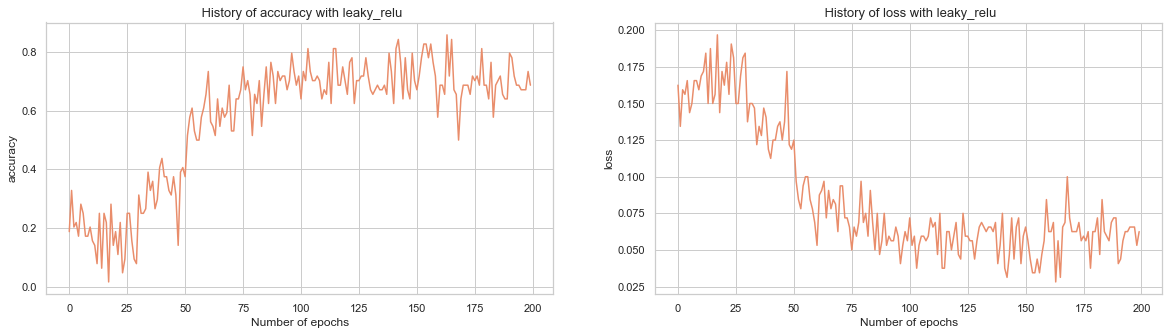

In [10]:
nn_leakyrelu = nn.NeuralNetwork(test=True, activation_name='leaky_relu')
df_leakyrelu = nn_leakyrelu.TRAIN(X_train, y_train, epochs=200, testing=True)
nn_leakyrelu.TEST(X_test, y_test)
make_plots(df_leakyrelu, ["accuracy", "loss"], "leaky_relu")
if savefigs: plt.savefig('figs/nn_leakyrelu.png', bbox_inches = 'tight')

Epoch 0, loss: 0.178125, accuracy: 0.109375
Epoch 1, loss: 0.171875, accuracy: 0.140625
Epoch 2, loss: 0.13125, accuracy: 0.34375
Epoch 3, loss: 0.159375, accuracy: 0.203125
Epoch 4, loss: 0.159375, accuracy: 0.203125
Epoch 5, loss: 0.115625, accuracy: 0.421875
Epoch 6, loss: 0.115625, accuracy: 0.421875
Epoch 7, loss: 0.1, accuracy: 0.5
Epoch 8, loss: 0.0875, accuracy: 0.5625
Epoch 9, loss: 0.065625, accuracy: 0.671875
Epoch 10, loss: 0.0875, accuracy: 0.5625
Epoch 11, loss: 0.05, accuracy: 0.75
Epoch 12, loss: 0.0875, accuracy: 0.5625
Epoch 13, loss: 0.06875, accuracy: 0.65625
Epoch 14, loss: 0.096875, accuracy: 0.515625
Epoch 15, loss: 0.115625, accuracy: 0.421875
Epoch 16, loss: 0.096875, accuracy: 0.515625
Epoch 17, loss: 0.1125, accuracy: 0.4375
Epoch 18, loss: 0.09375, accuracy: 0.53125
Epoch 19, loss: 0.096875, accuracy: 0.515625
Epoch 20, loss: 0.084375, accuracy: 0.578125
Epoch 21, loss: 0.09375, accuracy: 0.53125
Epoch 22, loss: 0.078125, accuracy: 0.609375
Epoch 23, loss: 0

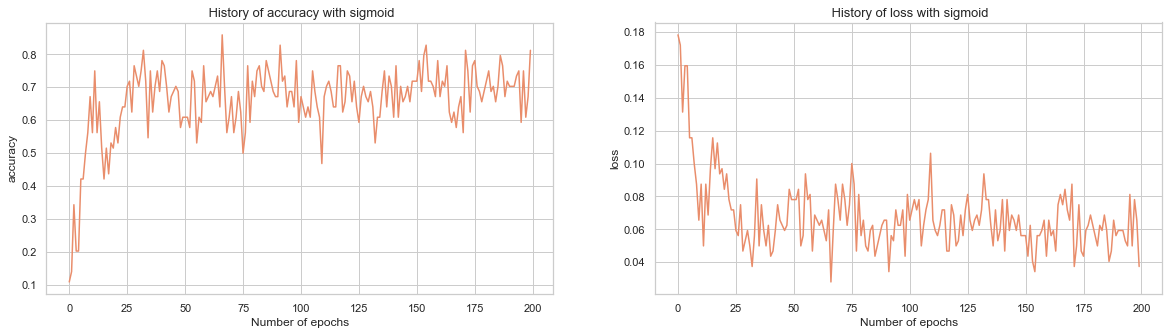

In [11]:
nn_sigmoid= nn.NeuralNetwork(test=True, activation_name='sigmoid')
df_sigmoid = nn_sigmoid.TRAIN(X_train, y_train, epochs=200, testing=True)
nn_sigmoid.TEST(X_test, y_test)
make_plots(df_sigmoid,["accuracy", "loss"], "sigmoid" )
if savefigs: plt.savefig('figs/nn_sigmoid.png', bbox_inches = 'tight')

# Decision Tree

In [12]:
x = StandardScaler().fit_transform(X_train)
pca = PCA(n_components=3)
pcax = pca.fit_transform(x)
df = pd.DataFrame(data = pcax, columns= ['pc 1', 'pc 2', 'pc 3'])
df = pd.concat([df, pd.DataFrame(y_train, columns = ['y'])], axis = 1)

x_t = StandardScaler().fit_transform(X_test)
pca = PCA(n_components=3)
pcax = pca.fit_transform(x_t)
df_t = pd.DataFrame(data = pcax, columns= ['pc 1', 'pc 2', 'pc 3'])
df_t = pd.concat([df_t, pd.DataFrame(y_test, columns = ['y'])], axis = 1)

##### Assesing correctness with iris dataset

In [13]:
iris = load_iris()
X = iris.data 
target = iris.target 
names = iris.target_names
irisdf = pd.DataFrame(X, columns=iris.feature_names)
irisdf['species'] = iris.target
irisX = irisdf[['sepal length (cm)', 'sepal width (cm)']]
irisy = irisdf['species']

irisX_train, irisX_test, irisy_train, irisy_test = train_test_split(irisX,irisy ,random_state=104, test_size=0.25, shuffle=True)

irisX_train = irisX_train.iloc[:, :-1].values
irisy_train= irisy_train.values.reshape(-1,1)

irisX_test = irisX_test.iloc[:, :-1].values
irisy_test = irisy_test.values.reshape(-1,1)


In [14]:

l = list()
for i in range(1,20):
    classifier = dt.DecisionTreeClassifier(min_samples_split=3, max_depth=i)
    classifier.fit(irisX_train,irisy_train)
    Y_pred = classifier.predict(irisX_test)
    Y_train_pred = classifier.predict(irisX_train)

        
    l.append([i, accuracy_score(irisy_train, Y_train_pred), accuracy_score(irisy_test, Y_pred)])

df_decisiontree = pd.DataFrame(data= l, columns=['depth', 'accuracy training', 'accuracy test'])
    

KeyError: 'info_gain'

#### PCA for Decision Tree

In [ ]:
df.head()

,pc 1,pc 2,pc 3,y
0,-0.504663,2.608573,8.314985,0
1,-18.182703,0.285265,-1.836173,1
2,5.345144,-2.348569,10.012179,0
3,-11.084712,1.340172,0.995292,3
4,-1.613810,10.749582,-1.596981,4


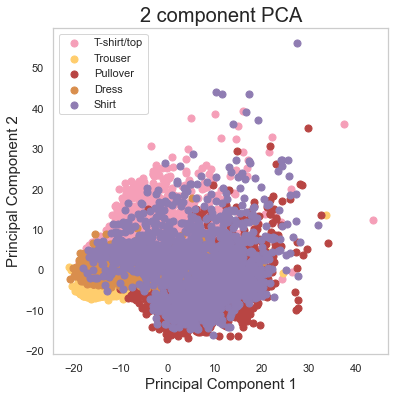

In [ ]:
colours = ['#F59FB8', '#FFCD6D', '#B84543', '#D98E4D', '#8F7CB2']
fig, ax = plt.subplots(figsize = (6,6)) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2, 3, 4]
for target, color in zip(targets,colours):
    indicesToKeep = df['y'] == target
    ax.scatter(df.loc[indicesToKeep, 'pc 2']
               , df.loc[indicesToKeep, 'pc 3']
               , c = color
               , s = 50)
ax.legend(NAMES);
ax.grid();

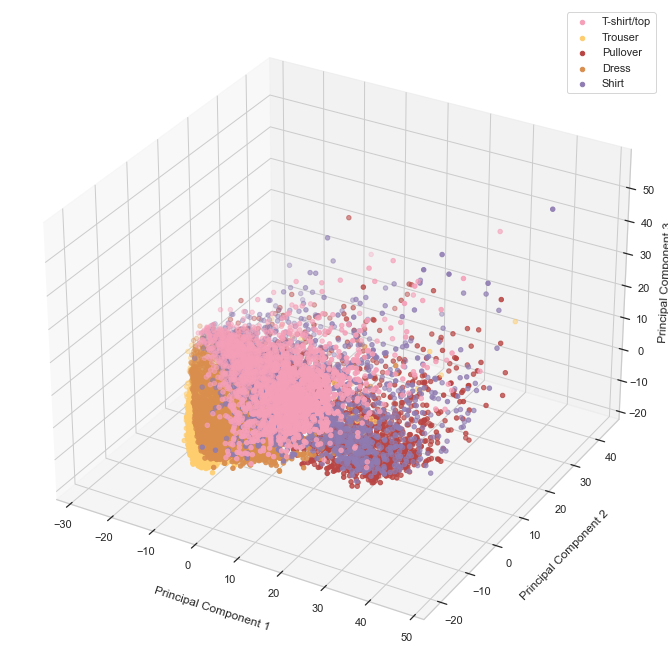

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')

for target, color in zip(targets,colours):
    indicesToKeep = df['y'] == target
    ax.scatter(df.loc[indicesToKeep, 'pc 1'], 
                df.loc[indicesToKeep, 'pc 2'],
                df.loc[indicesToKeep, 'pc 3'],
                c = color)

ax.set_xlabel('Principal Component 1', labelpad=15);
ax.set_ylabel('Principal Component 2', labelpad = 15);
ax.set_zlabel('Principal Component 3');
plt.subplots_adjust(right = 0.2)
ax.legend(NAMES);
plt.tight_layout();

if savefigs:plt.savefig('figs/pca.png', bbox_inches = 'tight')

In [ ]:
Y_train

array([[0],
       [1],
       [0],
       ...,
       [3],
       [0],
       [1]], dtype=uint8)

In [ ]:
X_train = df.iloc[:, :-1].values
Y_train= df.iloc[:, -1].values.reshape(-1,1)

X_test = df_t.iloc[:, :-1].values
Y_test = df_t.iloc[:, -1].values.reshape(-1,1)

In [ ]:

classifier = dt.DecisionTreeClassifier(min_samples_split=3, max_depth=6)
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)

KeyboardInterrupt: 

In [ ]:
print(accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test,Y_pred, target_names=NAMES))

0.6048
              precision    recall  f1-score   support

 T-shirt/top       0.75      0.69      0.72      1000
     Trouser       0.92      0.46      0.61      1000
    Pullover       0.60      0.83      0.70      1000
       Dress       0.51      0.85      0.64      1000
       Shirt       0.38      0.21      0.27      1000

    accuracy                           0.60      5000
   macro avg       0.63      0.60      0.59      5000
weighted avg       0.63      0.60      0.59      5000



In [ ]:

l = list()
for i in range(20):
    classifier = dt.DecisionTreeClassifier(min_samples_split=3, max_depth=i)
    classifier.fit(X_train,Y_train)
    Y_pred = classifier.predict(X_test)
    Y_train_pred = classifier.predict(X_train)

        
    l.append([i, accuracy_score(Y_train, Y_train_pred), accuracy_score(Y_test, Y_pred)])

df_decisiontree = pd.DataFrame(data= l, columns=['depth', 'accuracy training', 'accuracy test'])
    

In [ ]:
df_decisiontree.head()

,depth,accuracy training,accuracy test
0,1,0.5289,0.5084
1,2,0.6174,0.5236
2,3,0.6597,0.5664
3,4,0.6672,0.5706
4,5,0.6915,0.5976


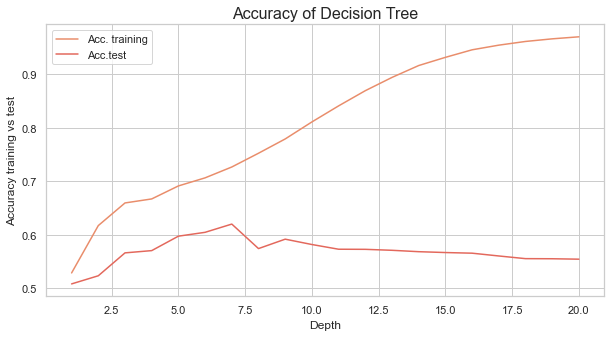

In [ ]:

fig, ax = plt.subplots(figsize = (10, 5))
colors_taratt = ['#761878', '#826fc9', '#b1c2f0' ]
sns.lineplot(x = 'depth', y = 'accuracy training', palette = colors_taratt, data = df_decisiontree);
sns.lineplot(x = 'depth', y = 'accuracy test', palette = colors_taratt, data = df_decisiontree);
ax.set_title(f'Accuracy of Decision Tree', size = 16)
ax.set(ylabel= f'Accuracy training vs test', xlabel = 'Depth');
ax.legend(['Acc. training', 'Acc.test'])

if savefigs: plt.savefig('figs/accuracydecisiontree.png', bbox_inches = 'tight')